Nhat Nguyen

3-20-2024

Problem 1: Naive Bayes

For this problem, I will assume the target that need to be classified is Construction Type. The rest will be the features and I will calculate each feature with respect to this target.

Construction Type (Target)

P(Apartment) = 7/20

P(House) = 7/20

P(Condo) = 6/20


Probability of at least two features:
To find the probability of the continuous variable in the features, I will perform Gaussian Naive Bayes on the features. First, I will try to find the mean and variance of Bathrooms and Local Price.

Local Price:

House

To calculate the mean, add the total number of variable in the feature corresponding to the class type in "Construction type" and divided by the size.

Mean: 5.0208 + 5.6039 + 5.8282 + 5.3003 + 6.2712 + 5.6039 + 6.6969 / 7 = 5.761

To calculate variance, subtract all the variable with the mean, square and adding them together, then divided by the size - 1

Variance: (5.0208-5.761)^2 + (5.6039-5.761)^2 + (5.8282-5.761)^2 + (5.3003-5.761)^2 + (6.2712-5.761)^2 + (5.6039-5.761)^2 + (6.6969-5.761)^2 / 6 = 0.325

To calculate the Gaussian Distribution, I will use its pdf formula and take House ID 24 from the Test tab as an example input for x.
Calculations are done using a calculator.

Gaussian Distribution: 0.59063952

Apartment

Mean: 4.9176 + 4.5573 + 5.0597 + 14.4598 + 5.05 + 8.2464 + 9.0384 / 7 = 7.33

Variance: (4.9176-7.33)^2 + (4.5573-7.33)^2 + (5.0597-7.33)^2 + (14.4598-7.33)^2 + (5.05-7.33)^2 + (8.2464-7.33)^2 + (9.0384-7.33)^2 / 6 = 13.08

Gaussian Distribution: 0.10395607

Condo

Mean: 4.5429 + 3.891 + 5.898 + 16.4202 + 5.9592 + 7.7841 / 6 = 7.42

Variance: (4.5429-7.42)^2 + (3.891-7.42)^2 + (5.898-7.42)^2 + (16.4202-7.42)^2 + (5.9592-7.42)^2 + (7.7841-7.42)^2 / 5 = 21.26

Gaussian Distribution: 0.08302698

Bathroom:

House

Mean: 1 + 1 + 1 + 1 + 1 + 1 + 1.5 / 7 = 1.0714

Variance: (1-1.07)^2 + (1-1.07)^2 + (1-1.07)^2 + (1-1.07)^2 + (1-1.07)^2 + (1-1.07)^2 + (1.5-1.07)^2 / 6 = 0.0357

Gaussian Distribution: 0.16123763

Apartment

Mean: 1 + 1 + 1 + 2.5 + 1 + 1.5 + 1 / 7 = 1.286

Variance: (1-1.286)^2 + (1-1.286)^2 + (1-1.286)^2 + (2.5-1.286)^2 + (1-1.286)^2 + (1.5-1.286)^2 + (1-1.286)^2 / 6 = 0.321

Gaussian Distribution: 0.65562764

Condo

Mean: 1 + 1 + 1 + 2.5 + 1 + 1.5 / 6 = 1.333

Variance: (1-1.333)^2 + (1-1.333)^2 + (1-1.333)^2 + (2.5-1.333)^2 + (1-1.333)^2 + (1.5-1.333)^2 / 5 = 0.367

Gaussian Distribution: 0.63475966

In [ ]:
# must run first in order to access the files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import pandas as pd
import numpy as np

class NaiveBayes:

    # features - calculate the mean and variance and store in dictionary of each features in the dataset
    def features(self, path):
        df = pd.read_excel(path, sheet_name='Train')

        # Select feature and class columns by name
        features_col = df.columns[1:-1]
        class_col = df.columns[-1]
        features = df[features_col]
        class_col = df[class_col]

        #Group by the class column
        grouped = df.groupby(class_col)

        # Initialize the result dictionary
        result_dict = {}

        # For each class (House, Apartment, Condo), assign the mean and variance of the features to the class
        for class_name, group in grouped:
            class_dict = {}
            for col in features:
                # Calculate mean and variance for each feature column
                mean = group[col].mean()
                variance = group[col].var()
                class_dict[col] = {'mean': mean, 'variance': variance}

            result_dict[class_name] = class_dict

        return result_dict

    # normal_dist - a function to calculate Gaussian distribution
    def normal_dist(self, x, mean, var):
        prob_density = (1 / (np.sqrt(2 * np.pi * var))) * np.exp(-((x - mean) ** 2) / (2 * var))
        return prob_density

    # predict - calculate the probability for each class and perform classification
    def predict(self, path, features_dict):
        df = pd.read_excel(path, sheet_name='Test')
        prior = {'House': 7/20, 'Apartment': 7/20, 'Condo': 6/20}
        example = 1

        for index, row in df.iterrows():
            # Calculate the posterior probability for each class
            print(f"\nExample {example}:")
            probabilities = {}
            for house_type, prior_prob in prior.items():
                likelihood = 1
                for feature, values in features_dict[house_type].items():
                    likelihood *= self.normal_dist(row[feature], values['mean'], values['variance'])
                posterior = likelihood * prior_prob
                probabilities[house_type] = posterior
                print(f"Probability of {house_type}: {posterior}")

            example += 1

            # Predict the class with the highest probability
            predicted_class = max(probabilities, key=probabilities.get)
            print(f"Prediction: {predicted_class}")

# Main method
if __name__ == '__main__':
    path = '/content/drive/My Drive/Colab Notebooks/Asssignment2_NB_Data.xlsx'
    NB = NaiveBayes()
    features_dict = NB.features(path)
    NB.predict(path, features_dict)


Example 1:
Probability of House: 2.2783346320526746e-05
Probability of Apartment: 1.9821473791611913e-06
Probability of Condo: 1.7117341592585915e-06
Prediction: House

Example 2:
Probability of House: 4.480076553881291e-13
Probability of Apartment: 4.85570900522105e-07
Probability of Condo: 2.67911729774906e-07
Prediction: Apartment

Example 3:
Probability of House: 1.3881126178647385e-09
Probability of Apartment: 6.402867269745929e-08
Probability of Condo: 2.4566703656852755e-08
Prediction: Apartment

Example 4:
Probability of House: 1.0401992649161801e-15
Probability of Apartment: 1.1475454140521518e-06
Probability of Condo: 1.0080872405853767e-06
Prediction: Apartment

Example 5:
Probability of House: 1.9782531692245093e-31
Probability of Apartment: 4.0742909419261184e-07
Probability of Condo: 4.3050932255322325e-07
Prediction: Condo


Analysis Report for problem 1:

I'll analyze the output in terms of these metrics: accuracy, precision and recall

Accuracy

-Using Gaussian distribution, my model classification according to the features in the Test sheet are:

House, Apartment, Apartment, Apartment, Condo

-Meanwhile, the actual classification according to the Test sheet are:

Apartment, House, House, Apartment, Apartment

In this case, my model prediction compare to the actual classification is 1/5, or around 20% accuracy. It correctly guesses House ID 27 to be Apartment and failed pretty much everything else.

Precision

Precision are calculated using the following formula:

Precision = True Positive / True Positive + False Positive

House:

True Positive: 0

False Positive: 1

Precision = 0/0+1 = 0

Apartment:

True Positive: 1

False Positive: 2

Precision = 1/1+2 = 1/3

Apartment:

True Positive: 0

False Positive: 1

Precision = 0/0+1 = 0

This means the model is not very precise in identifying Houses and Condos, and has a low precision for Apartments.

In my opinion, there is a lot of factor that could lead to such poor performance. Small dataset, limited features, and only three type of class for classifications are some of the reason I can think of. Another reasons having to do with Naive Bayes itself; it assumes all input features to be independent from each other which is no way replicate real-world scenario, thus having limited features and small dataset will downgrade its predictive ability even more.

Problem 2: K Means Image Compression


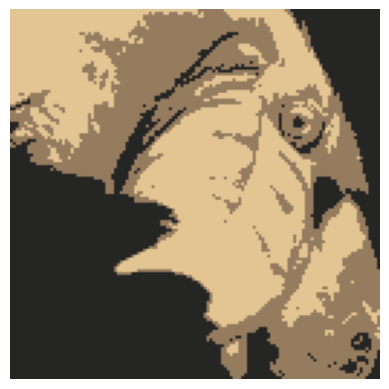

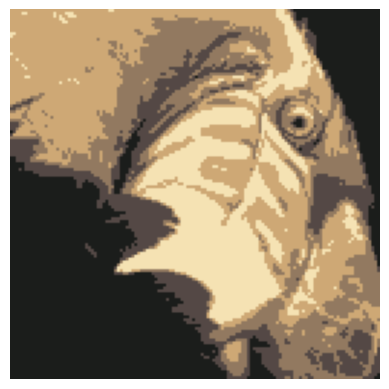

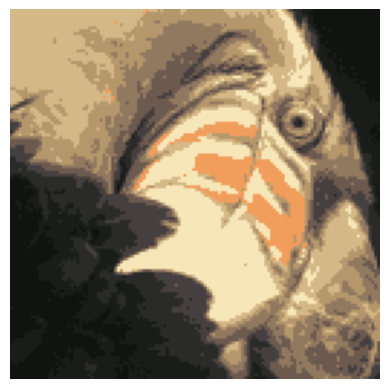

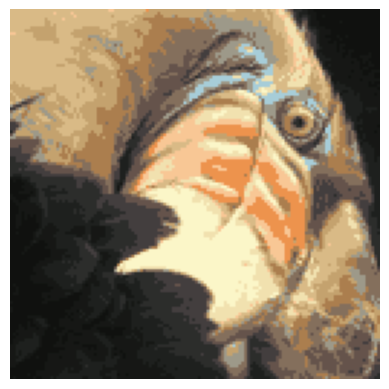

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

class KMeansCompressed:
  # euclid_dist - function to calculate the Euclidian distance between centroid
  def euclid_dist(self, x1, y1, x2, y2):
    return ((x1-x2)**2 + (y1-y2)**2)**0.5

  # k_means - the KMeans algorithm
  def k_means(self, pixel, k):
    # Get the number of pixel and the color channels of that pixel(RGB)
    pixel_num, channels = pixel.shape

    #Random initialization of centroids
    means = np.zeros((k, channels))
    for i in range(k):
        random_ind = np.random.choice(pixel_num, replace=False)
        means[i] = pixel[random_ind]

    #Set the fix iteration and an index array of centroids that the pixel coressponded to
    iteration = 10
    index_arr = np.zeros(pixel_num)

    # while loop to iteratively update the centroid and assign pixels to centroids
    while iteration > 0:
      # min_dist and for loop to assign each pixel to its nearest centroid
        for i in range(pixel_num):
            min_dist = float('inf')
            # Calculate the nearest distance from each pixel to the nearest cluster
            for j in range(k):
                x1, y1 = pixel[i, 0], pixel[i, 1]
                x2, y2 = means[j, 0], means[j, 1]
                dist = self.euclid_dist(x1, y1, x2, y2)
                # Map each pixel to its assigned cluster
                if dist < min_dist:
                    min_dist = dist
                    index_arr[i] = j
        # Update centroids based on the assigned pixels
        for j in range(k):
            k_points = pixel[index_arr == j, :]
            if len(k_points) > 0:
                means[j] = np.mean(k_points, axis=0)

        iteration -= 1

    return means, index_arr

  # compressed_img - return a compressed version of the image
  def compressed_img(self, means, index_arr, pixel, original_shape):
    recovered = means[index_arr.astype(int)]
    recovered_img = recovered.reshape(original_shape)
    return recovered_img

# Main method
if __name__ == '__main__':
    img = cv2.imread('/content/drive/My Drive/Colab Notebooks/test_image.png')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    original_shape = img.shape
    pixel = img.reshape((-1, 3)) / 255.0
    kmean_class = KMeansCompressed()

    k = 3
    means, index = kmean_class.k_means(pixel, k)
    recovered_img = kmean_class.compressed_img(means, index, pixel, original_shape)
    plt.imshow(recovered_img)
    plt.axis('off')
    plt.show()


    k = 5
    means2, index2 = kmean_class.k_means(pixel, k)
    recovered_img = kmean_class.compressed_img(means2, index2, pixel, original_shape)
    plt.imshow(recovered_img)
    plt.axis('off')
    plt.show()


    k = 10
    means3, index3 = kmean_class.k_means(pixel, k)
    recovered_img = kmean_class.compressed_img(means3, index3, pixel, original_shape)
    plt.imshow(recovered_img)
    plt.axis('off')
    plt.show()


    k = 16
    means4, index4 = kmean_class.k_means(pixel, k)
    recovered_img = kmean_class.compressed_img(means4, index4, pixel, original_shape)
    plt.imshow(recovered_img)
    plt.axis('off')
    plt.show()


After running this code, the output shows 4 image at different k value. I will analyze the visual clarity of these 4 images to show which values work best.

At k = 3

The image shows a very basic visual compression with only 3 colors being show. Though I can make out what the image is representing, it is nowhere close to the original image in terms of color and clarity.

At k = 5

The image shows a more detail as more color has been taken into account by the algorithm due to the increase in clusters, which help improve the color display by the pixels. It is yet to be similar to the original image.

At k = 10

The image are fairly close to the original image as the details and colors has improved significantly for each pixel, however it still lacks color diversity as major colors around the beak of the birds lacks blue and orange. The image is still pretty much grayscale but detail enough

At k = 16

The image almost match the original test image in terms of colors and details. It lacks the resolution clarity that the original have, however considering that this is a compressed image, the resulting image contains all the basic colors of the orignal image, thus is balance in terms of clusters usage and image quality.

Therefore, the number of clusters k that are suitable for this problem would be at least 16.

Problem 3: Linear Regression


1. First, as the problem suggested, I tried plotting the x_test and y_test data, and the result of the scatter plot is a sinusoidal graph, the type of graph that you
would expect to see from a trigonometrical function. Although I still can't quite grasp the relationship, I think this is a good start.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

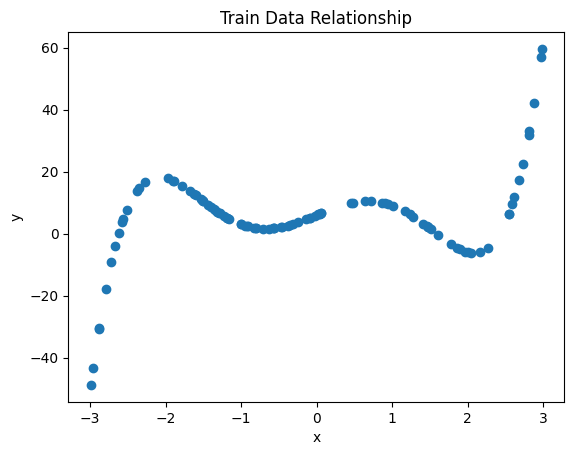

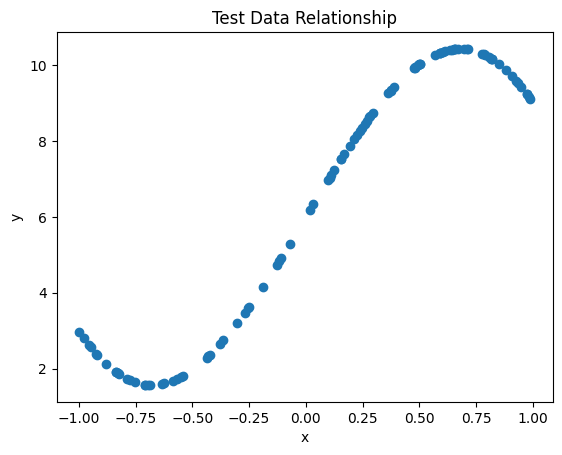

In [4]:
x_train = np.load('/content/drive/My Drive/Colab Notebooks/x_train.npy')
x_test = np.load('/content/drive/My Drive/Colab Notebooks/x_test.npy')
y_train = np.load('/content/drive/My Drive/Colab Notebooks/y_train.npy')
y_test = np.load('/content/drive/My Drive/Colab Notebooks/y_test.npy')

plt.scatter(x_train, y_train)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Train Data Relationship')
plt.show()
plt.scatter(x_test, y_test)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Test Data Relationship')
plt.show()

2.1 Linear Regression Using Gradient Descent

I will implement a linear regression model using gradient descent.

Linear model define: y^ = θ0 + θ1*x

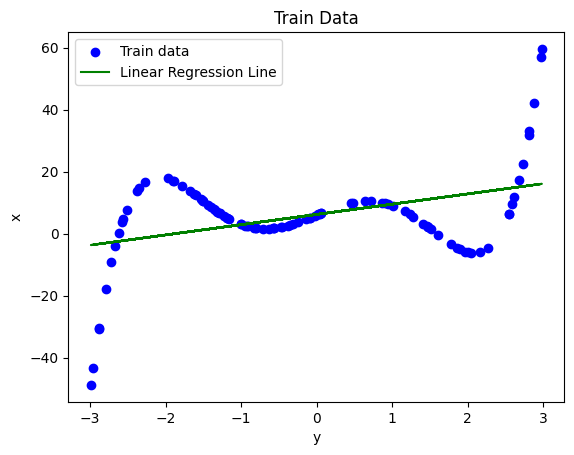

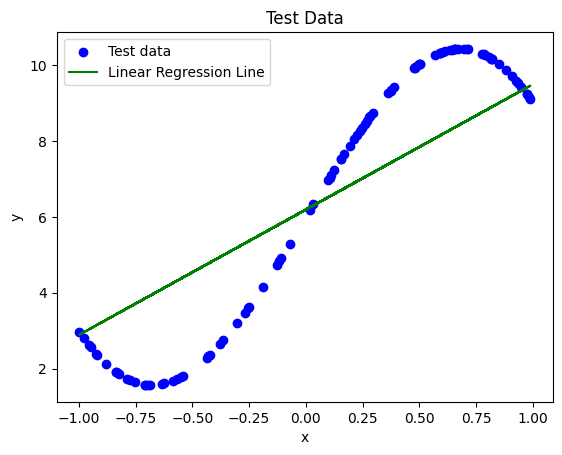

Slope(θ1): 3.3065375285125382
Intercept(θ0): 6.192887660084306
Equation: y = 6.19 + 3.31x
Train MSE: 84.66736325156246
Test MSE: 1.4100091868677576


In [37]:
class Linear_Regression:

  # Initialization
  def __init__(self, X, y, iterations, learning_rate):
    self.X = np.hstack((np.ones((X.shape[0], 1)), X))
    self.y = y.reshape(-1, 1)
    self.max_iter = iterations
    self.eta = learning_rate
    self.thet = np.zeros((self.X.shape[1], 1))

  # gradient_descent - the Gradient Descent algorithm
  # Make prediction, compute the gradient, and update parameters according to the gradient
  def gradient_descent(self):
    for _ in range(self.max_iter):
      predictions = self.predict()
      gradient = self.compute_grad(self.X, self.y, predictions)
      self.update(gradient)

  # predict - compute the prediction using features at each iteration
  def predict(self, X=None):
    if X is not None:
      X = np.hstack((np.ones((X.shape[0], 1)), X))
    else:
      X = self.X
    return np.dot(X, self.thet)

  # compute_grad - compute the gradient using error (the difference between actual and target value) and training data
  def compute_grad(self, X, y, predictions):
    error = predictions - y
    gradient = np.dot(X.T, error) / len(y)
    return gradient

  # update - update the parameter thet using learning rate and gradient
  def update(self, gradient):
    self.thet -= self.eta * gradient

  # compute_cost - compute the MSE of the linear regression model
  def compute_cost(self):
    m = len(self.y)
    predictions = self.predict()
    J = (1/(2*m))*np.sum((predictions - self.y)**2)
    return J

# Main method
if __name__ == '__main__':
  iterations = 1000
  learning_rate = 0.01
  model = Linear_Regression(x_train, y_train, iterations, learning_rate)
  model.gradient_descent()

  # Plotting train data
  plt.scatter(x_train, y_train, color='blue', label='Train data')
  plt.plot(x_train, model.predict(x_train), color='green', label='Linear Regression Line')
  plt.xlabel('y')
  plt.ylabel('x')
  plt.title('Train Data')
  plt.legend()
  plt.show()

  # Plotting test data
  plt.scatter(x_test, y_test, color='blue', label='Test data')
  plt.plot(x_test, model.predict(x_test), color='green', label='Linear Regression Line')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Test Data')
  plt.legend()
  plt.show()

  # Display the coefficient, intercept, and the equation for the regression line
  thet0 = model.thet[0][0]
  thet1 = model.thet[1:][0][0]
  print('Slope(θ1):', thet1)
  print('Intercept(θ0):', thet0)
  # y^ = θ0 + θ1*x
  print(f'Equation: y = {thet0:.2f} + {thet1:.2f}x')
  # MSE
  train_mse = model.compute_cost()
  model.X = np.hstack((np.ones((x_test.shape[0], 1)), x_test))
  model.y = y_test
  test_mse = model.compute_cost()
  print('Train MSE:', train_mse)
  print('Test MSE:', test_mse)





2.2 Linear Regression with Features Engineering


a. Is the relationship linear?

No, the relationship is non-linear.

b. Do you need feature engineering to add any non-linearity?

Absolutely. Since the graph itself is non-linear, I will have to feature engineering to add non-linearity to model the trend observed.

c. If so, how can you engineer these features?

I can use basis function to extract features that can help fit the linear model to the observed non-linear curve.

d. What are some functions that you can try?

Some functions that I can try are the Polynomial feature with degree from 2 and up to degree 5.

e. Plot each of them individually to verify!


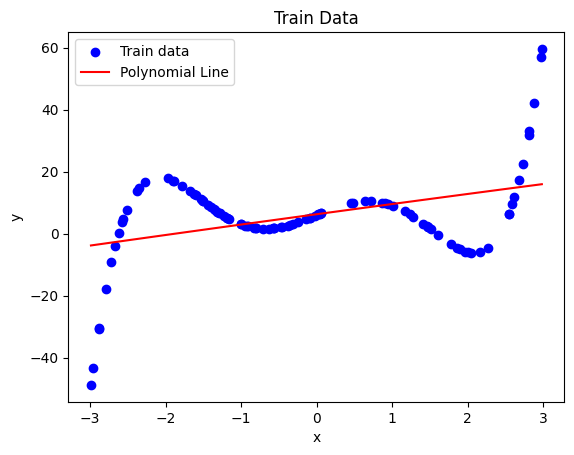

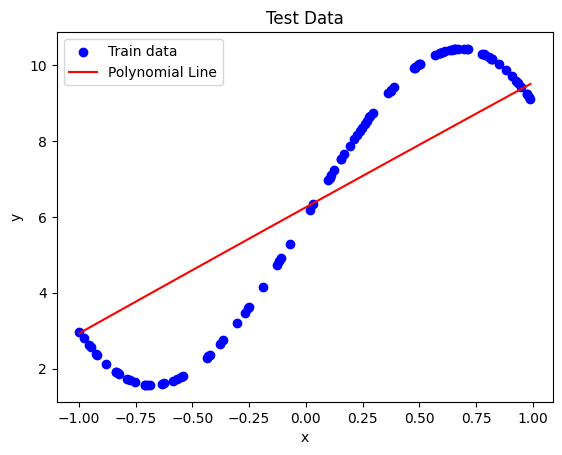

Degree: 2
Equation: y^ = 6.255 + 3.308e+00*x^1 + -2.087e-02*x^2
Train MSE: 84.66565897192173
Test MSE: 1.3987795527178457


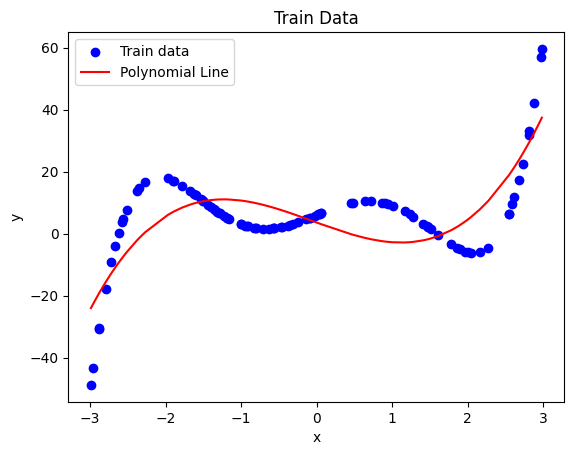

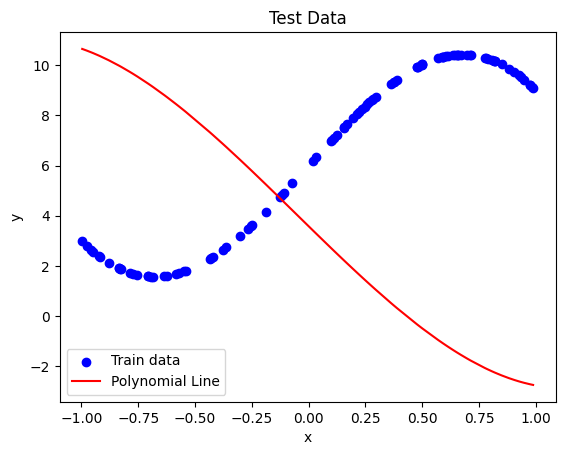

Degree: 3
Equation: y^ = 3.579 + -8.866e+00*x^1 + 3.668e-01*x^2 + 2.149e+00*x^3
Train MSE: 40.53887072882679
Test MSE: 39.485909601228826


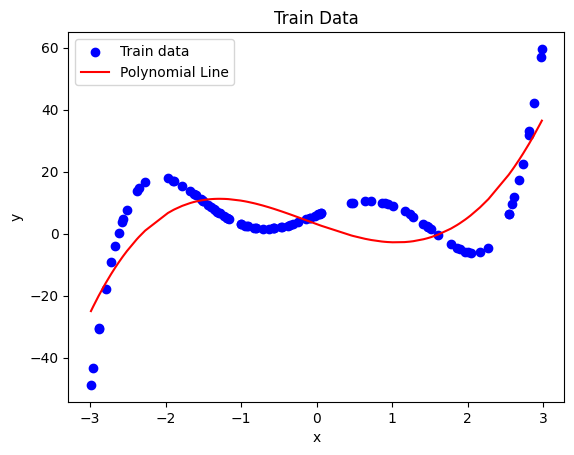

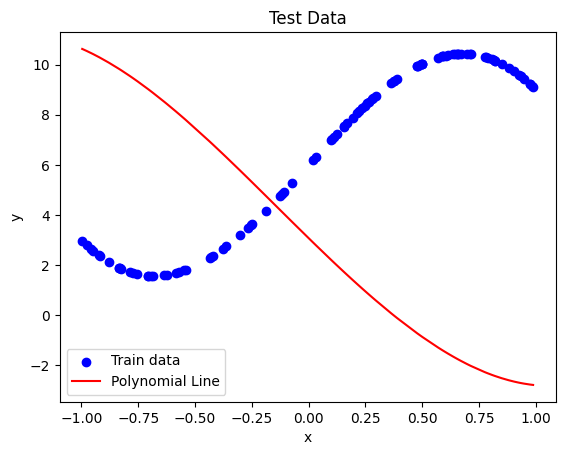

Degree: 4
Equation: y^ = 3.074 + -8.860e+00*x^1 + 9.152e-01*x^2 + 2.148e+00*x^3 + -6.737e-02*x^4
Train MSE: 40.45177299356291
Test MSE: 40.740305095247116


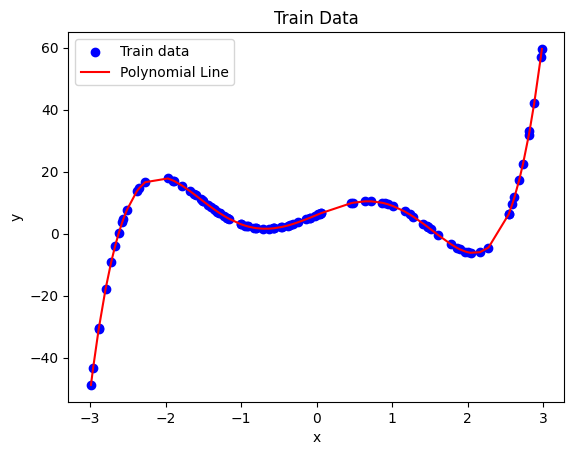

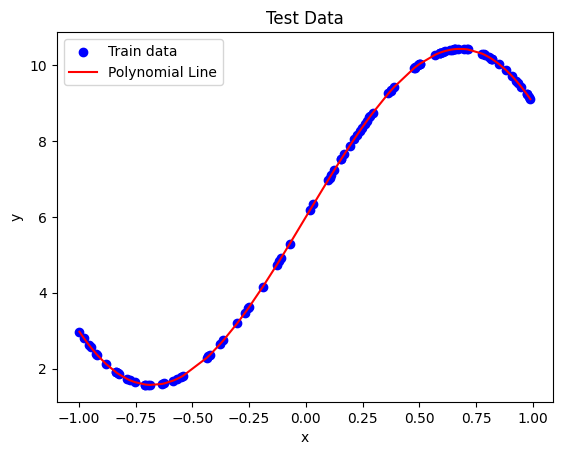

Degree: 5
Equation: y^ = 6.000 + 1.000e+01*x^1 + 8.259e-06*x^2 + -8.000e+00*x^3 + -7.633e-07*x^4 + 1.000e+00*x^5
Train MSE: 1.816900384412512e-10
Test MSE: 4.1503069605721986e-10


In [34]:
# Linear_Basis is a child of Linear_Regression with engineer features (inheritance)
class Linear_Basis(Linear_Regression):

  # Initialization
  def __init__(self, X, y, degree, iterations, learning_rate):
    X_poly = self.add_features(X, degree)
    self.degree = degree
    super().__init__(X_poly, y, iterations, learning_rate)

  # add_features - Engineer features with polynomial functions to predict non-linear relationship
  def add_features(self, X, degree):
        X_poly = X.copy()
        for i in range(2, degree + 1):
            X_poly = np.hstack((X_poly, X ** i))
        return X_poly

  # predict - compute the prediction using features at each iteration
  def predict(self, X=None):
    if X is not None:
      X = self.add_features(X, self.degree)
      X = np.hstack((np.ones((X.shape[0], 1)), X))
    else:
      X = self.X
    return np.dot(X, self.thet)

# Main method
if __name__ == '__main__':

  for i in range (2, 6):
      degree = i
      # Intialize model with the current degree i
      model = Linear_Basis(x_train, y_train, degree, iterations=1000000, learning_rate=0.0001)
      model.gradient_descent()

      # # Generate predictions
      y_pred = model.predict(x_train)
      y_pred_test = model.predict(x_test)

      # Sort the y_pred for plotting
      sorted_indices_train = np.argsort(x_train.ravel())
      sorted_indices_test = np.argsort(x_test.ravel())
      y_pred_sorted_train = y_pred[sorted_indices_train]
      y_pred_test_sorted = y_pred_test[sorted_indices_test]

      # Plot
      plt.scatter(x_train, y_train, color='blue', label='Train data')
      plt.plot(x_train[sorted_indices_train], y_pred_sorted_train, color='red', label=f'Polynomial Line')
      plt.title('Train Data')
      plt.xlabel('x')
      plt.ylabel('y')
      plt.legend()
      plt.show()

      plt.scatter(x_test, y_test, color='blue', label='Train data')
      plt.plot(x_test[sorted_indices_test], y_pred_test_sorted, color='red', label=f'Polynomial Line')
      plt.title('Test Data')
      plt.xlabel('x')
      plt.ylabel('y')
      plt.legend()
      plt.show()

      # Output
      # Degree
      print('Degree:', degree)

      # Equation y^ = θ0 + θ1*x + (θ2*x^2 + ... + θi*x^j) for each degree j=i
      coeffs_list = []
      for i, s in enumerate(model.thet[1:]):
        coeffs_list.append(f"{s[0]:.3e}*x^{i+1}")

      equation = f"Equation: y^ = {model.thet[0][0]:.3f} + " + " + ".join(coeffs_list)
      print(equation)

      # MSE
      mse = model.compute_cost()
      print('Train MSE:', mse)
      X = model.add_features(x_test, degree)
      model.X = np.hstack((np.ones((x_test.shape[0], 1)), X))
      model.y = y_test
      mse_test = model.compute_cost()
      print('Test MSE:', mse_test)


Linear Regression - Report

Preparation and Thought Process

First, I would like to discuss what's linear regression and gradient descent and what method did I use to overcome the problem and generate a linear regression model for it. So, linear regression is a model that models the relationship between dependent variable y and independent variable x by fitting a linear equation onto the observed data.


According to this definition, I need to first be able to visualize the relationship between the variable in the x and y dataset, so I plot them using matplotlib and the result is two wave-like sinusoidal graph that is not linear. From this information, I moved on to find the tools that can help me model this relationship.

Aside from just implementing linear regression model, I also have to use gradient descent to help minimize the cost to find the best fit line. Basically, there are multiple ways in which a regression line can be model and fit to the data trends, therefore to find the best fit line it's important to find the data with the lowest average difference between the predicted data and the actual data observed, or cost function. To do that I would need gradient descent, an optimization algorithm that can minimize the cost function of a model by iteratively moving toward the minimum of the cost function.

Approaching Linear Regression with gradient descent

In my implementation of the linear regression, I define four methods: gradient_descent, predict, compute_gradient, and update. gradient_descend is the function that created the model using the other support functions. predict function calculates the predicted values using the current parameter values (thet). compute_grad computes the gradient using error (the difference between actual and target value) and training data. Finally, update function updates the parameter thet using learning rate and the computed gradient. The additional computed_cost function is used to measure the MSE of the model. The result after generating the model and running the input is as follow:

Slope(θ1): 3.3065375285125382

Intercept(θ0): 6.192887660084306

Equation(defined y^ = θ0 + θ1*x): y^ = 6.19 + 3.31x

Train MSE: 84.66736325156246

Test MSE: 1.4100091868677576

Engineering features for non-linear relationship with Bias Functions

Although the result looks good with low MSE on test data, it is by no mean the correct answer. In truth, my implementation of linear regression model assumes that the relationship between x and y is linear, when in fact it isn't. The relationship is non-linear, meaning that I have to look for different ways to model the relationship, and that is with Basis Functions. Basis Functions can help add more features that are deterministic functions of the original features, and non-linear basis functions allowed the modeling of non-linearity regression.

One of the Basis functions that I implemented for my approach is the polynomial basis function. Polynomial basis allows me to capture non-linear relationships with linear regression by extending the feature set with polynomial terms. This means that instead of modeling the relationship as a straight line (linear), I model it as a curve (non-linear) that better fits the observed data. Here's my defined linear model for linear regression with polynomial basis functions:

y = θ0 + θ1*x + (θ2*x^2 + ... + θi*x^j) for each degree j=i

In my second approach, I really didn't have to change much because I have already have the base gradient descent algorithm running great. Instead, I create a new function called add_features that engineer polynomial features into the data for my linear regression model and update the parameters with polynomial feature set. The result, in addition to the plot, is as follow for polynomial function from degree 2 to 5:

Degree: 2

Equation: y^ = 6.255 + 3.308e+00*x^1 + -2.087e-02*x^2

MSE: 84.66565897192173

Test MSE: 1.3987795527178457

Degree: 3

Equation: y^ = 3.579 + -8.866e+00*x^1 + 3.668e-01*x^2 + 2.149e+00*x^3

MSE: 40.53887072882679

Test MSE: 39.485909601228826

Degree: 4

Equation: y^ = 3.074 + -8.860e+00*x^1 + 9.152e-01*x^2 + 2.148e+00*x^3 + -6.737e-02*x^4

MSE: 40.45177299356291

Test MSE: 40.740305095247116

Degree: 5

Equation: y^ = 6.000 + 1.000e+01*x^1 + 8.259e-06*x^2 + -8.000e+00*x^3 + -7.633e-07*x^4 + 1.000e+00*x^5

MSE: 1.816900384412512e-10

Test MSE: 4.1503069605721986e-10

At degree = 5, the resulted linear regression line perfectly fits the trend of relationship for the train and test data, with the Mean Squared Error practically equals to 0. Therefore, the equation that models the relationship between x and y of this dataset is:

y^ = 6.000 + 1.000e+01*x^1 + 8.259e-06*x^2 + -8.000e+00*x^3 + -7.633e-07*x^4 + 1.000e+00*x^5

or adjusted:

y = 6 + 1e+01x - 8x^3 + x^5

The θ coefficients at x^2 and x^4 are close to 0 so technically they aren't part of the equation.